In [1]:
import sqlite3
import h5py
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = np.load('embeddings_by_length.npy')
print(data.shape)

(1000, 1024)


In [3]:
import pandas as pd

# read third party embeddings from the tsv file
df = pd.read_csv('filtered_data.tsv', sep='\t')
df1 = pd.read_csv('filtered_data1.tsv', sep='\t')

# get the euclid sim and cosine sim from the columns
euclid_sim = df['embdd_eucld'].values
cos_sim = df['embdd_cos'].values
euclid_sim1 = df1['embdd_eucld'].values
cos_sim1 = df1['embdd_cos'].values

In [4]:
# load the embedding data from the unshuffled sequences
# ids are in ruseq.txt
conn = sqlite3.connect('../uniref90-10pm.db')
c = conn.cursor()

# get the embeddings
embeddings_unshuff = []
with open('../rs/ruseq.txt') as f:
    keys = f.read().splitlines()

for key in keys:
    c.execute('SELECT embedding FROM uniref90 WHERE name = ?', (key,))
    embedding = c.fetchone()[0]
    if np.frombuffer(embedding, dtype=np.float16).shape[0] != 1024:
        embeddings_unshuff.append(np.frombuffer(embedding, dtype=np.float32))
    else:
        embeddings_unshuff.append(np.frombuffer(embedding, dtype=np.float16))

embeddings_unshuff = np.array(embeddings_unshuff)
conn.close()

(1000,)


C:\Users\mackm\AppData\Local\Temp\ipykernel_20260\1559374125.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([np.linalg.norm(embeddings_unshuff, axis=1), np.linalg.norm(data, axis=1)], labels=['UniRef90', 'Random'])


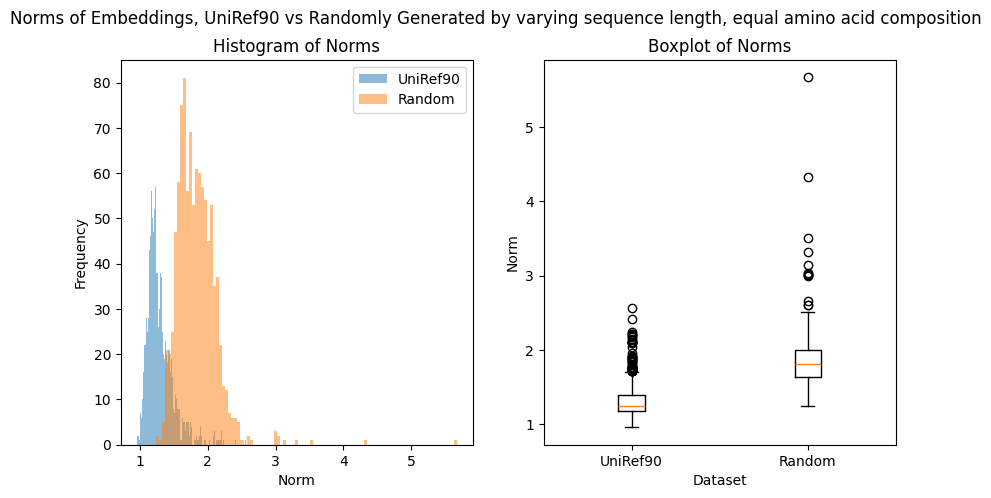

In [9]:
# plot the norms of the embeddings on a histogram and a boxplot on the same plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('Norms of Embeddings, UniRef90 vs Randomly Generated by varying sequence length, equal amino acid composition')
print(np.linalg.norm(embeddings_unshuff, axis=1).shape)
ax[0].hist(np.linalg.norm(embeddings_unshuff, axis=1), bins=100, alpha=0.5, label='UniRef90')
ax[0].hist(np.linalg.norm(data, axis=1), bins=100, alpha=0.5, label='Random')
ax[0].set_title('Histogram of Norms')
ax[0].set_xlabel('Norm')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].boxplot([np.linalg.norm(embeddings_unshuff, axis=1), np.linalg.norm(data, axis=1)], labels=['UniRef90', 'Random'])
ax[1].set_title('Boxplot of Norms')
ax[1].set_ylabel('Norm')
ax[1].set_xlabel('Dataset')
plt.show()

In [27]:
from scipy.spatial.distance import euclidean

similarity0 = []
sims_unshuff0 = []
for x in range(data.shape[0]):
    for y in range(x+1, data.shape[0]):
        similarity0.append(0.5 / (0.5 + euclidean(embeddings_unshuff[x], data[y])))
        sims_unshuff0.append(0.5 / (0.5 + euclidean(embeddings_unshuff[x], embeddings_unshuff[y])))


In [28]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity1 = []
sims_unshuff1 = []
for x in range(data.shape[0]):
    for y in range(x+1, data.shape[0]):
        similarity1.append(cosine_similarity([embeddings_unshuff[x]], [data[y]])[0][0])
        sims_unshuff1.append(cosine_similarity([embeddings_unshuff[x]], [embeddings_unshuff[y]])[0][0])



C:\Users\mackm\AppData\Local\Temp\ipykernel_14224\1215642685.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([similarity0, sims_unshuff0, euclid_sim, euclid_sim1], labels=['Random-Real', 'UniRef90', 'praba-same-F', 'praba-diff-F'])


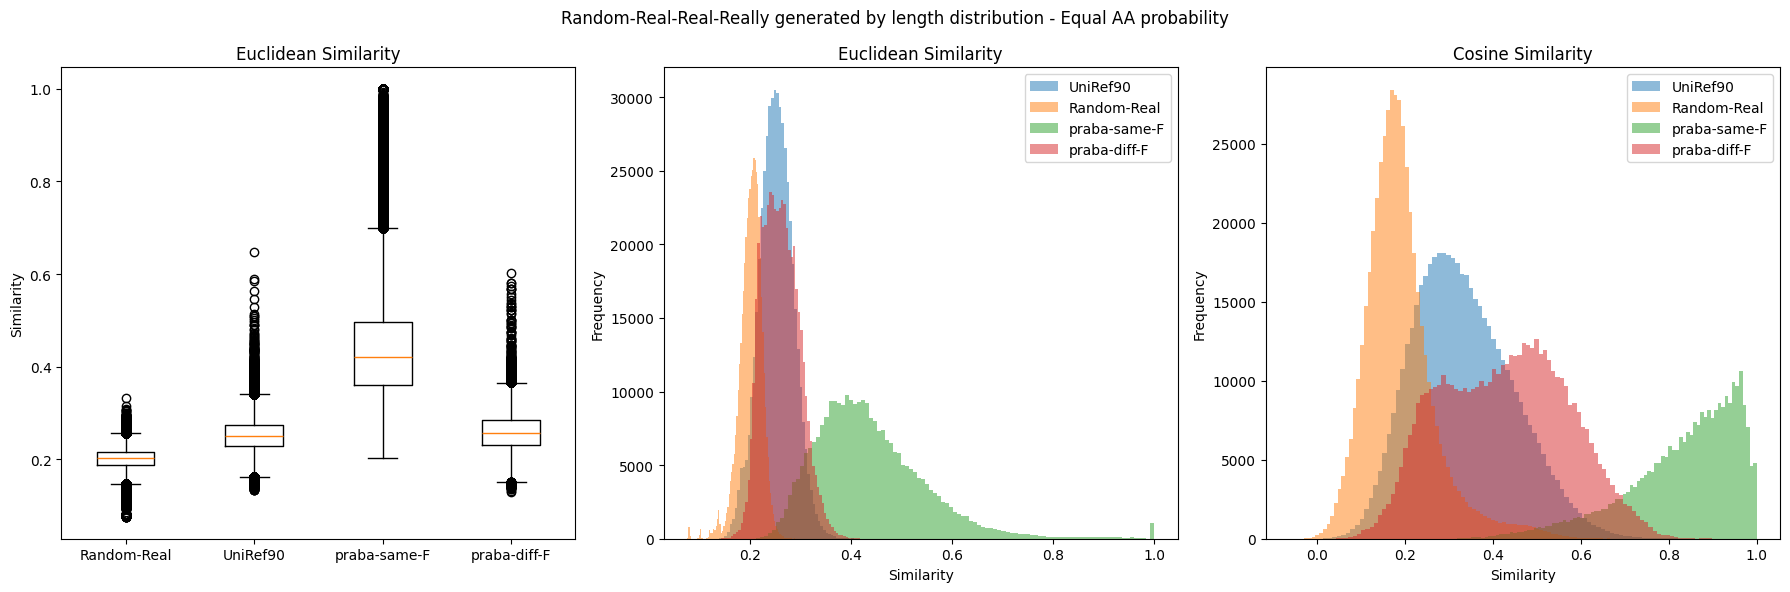

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a 1x3 grid of subplots for the second set

plt.suptitle('Random-Real generated by length distribution - Equal AA probability')

axs[0].boxplot([similarity0, sims_unshuff0, euclid_sim, euclid_sim1], labels=['Random-Real', 'UniRef90', 'praba-same-F', 'praba-diff-F'])
axs[0].set_title('Euclidean Similarity')
axs[0].set_ylabel('Similarity')

axs[1].hist(sims_unshuff0, bins=100, alpha=0.5, label='UniRef90')
axs[1].hist(similarity0, bins=100, alpha=0.5, label='Random-Real')
axs[1].hist(euclid_sim, bins=100, alpha=0.5, label='praba-same-F')
axs[1].hist(euclid_sim1, bins=100, alpha=0.5, label='praba-diff-F')
axs[1].set_title('Euclidean Similarity')
axs[1].legend(loc='upper right')
axs[1].set_xlabel('Similarity')
axs[1].set_ylabel('Frequency')

axs[2].hist(sims_unshuff1, bins=100, alpha=0.5, label='UniRef90')
axs[2].hist(similarity1, bins=100, alpha=0.5, label='Random-Real')
axs[2].hist(cos_sim, bins=100, alpha=0.5, label='praba-same-F')
axs[2].hist(cos_sim1, bins=100, alpha=0.5, label='praba-diff-F')
axs[2].set_title('Cosine Similarity')
axs[2].legend(loc='upper right')
axs[2].set_xlabel('Similarity')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
data = np.load('embeddings_by_composition.npy')
print(data.shape)

(1000, 1024)


(1000,)


C:\Users\mackm\AppData\Local\Temp\ipykernel_20260\2445099933.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([np.linalg.norm(embeddings_unshuff, axis=1), np.linalg.norm(data, axis=1)], labels=['UniRef90', 'Random'])


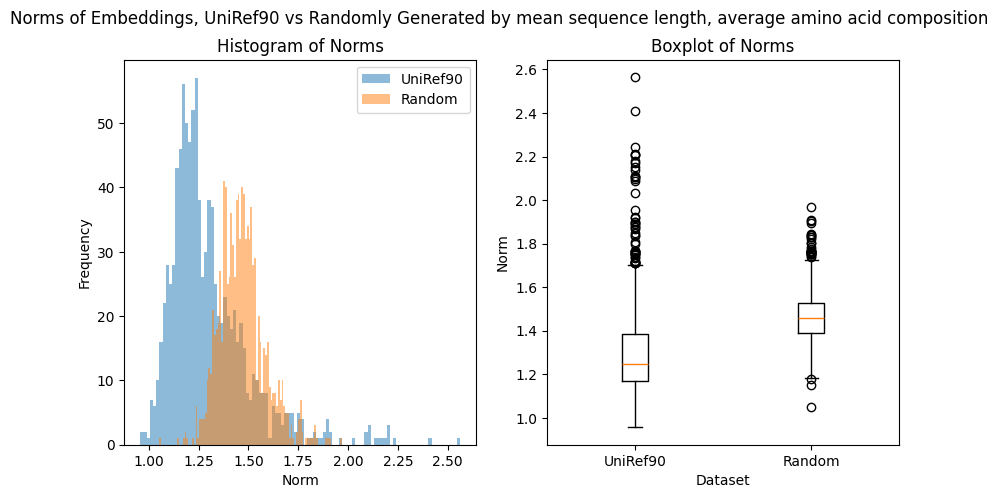

In [11]:
# plot the norms of the embeddings on a histogram and a boxplot on the same plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('Norms of Embeddings, UniRef90 vs Randomly Generated by mean sequence length, average amino acid composition')
print(np.linalg.norm(embeddings_unshuff, axis=1).shape)
ax[0].hist(np.linalg.norm(embeddings_unshuff, axis=1), bins=100, alpha=0.5, label='UniRef90')
ax[0].hist(np.linalg.norm(data, axis=1), bins=100, alpha=0.5, label='Random')
ax[0].set_title('Histogram of Norms')
ax[0].set_xlabel('Norm')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].boxplot([np.linalg.norm(embeddings_unshuff, axis=1), np.linalg.norm(data, axis=1)], labels=['UniRef90', 'Random'])
ax[1].set_title('Boxplot of Norms')
ax[1].set_ylabel('Norm')
ax[1].set_xlabel('Dataset')
plt.show()

In [31]:
from scipy.spatial.distance import euclidean

similarity0 = []
sims_unshuff0 = []
for x in range(data.shape[0]):
    for y in range(x+1, data.shape[0]):
        similarity0.append(0.5 / (0.5 + euclidean(embeddings_unshuff[x], data[y])))
        sims_unshuff0.append(0.5 / (0.5 + euclidean(embeddings_unshuff[x], embeddings_unshuff[y])))

In [32]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity1 = []
sims_unshuff1 = []
for x in range(data.shape[0]):
    for y in range(x+1, data.shape[0]):
        similarity1.append(cosine_similarity([embeddings_unshuff[x]], [data[y]])[0][0])
        sims_unshuff1.append(cosine_similarity([embeddings_unshuff[x]], [embeddings_unshuff[y]])[0][0])

C:\Users\mackm\AppData\Local\Temp\ipykernel_14224\3816006150.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([similarity0, sims_unshuff0, euclid_sim, euclid_sim1], labels=['Random-Real', 'UniRef90', 'praba-same-F', 'praba-diff-F'])


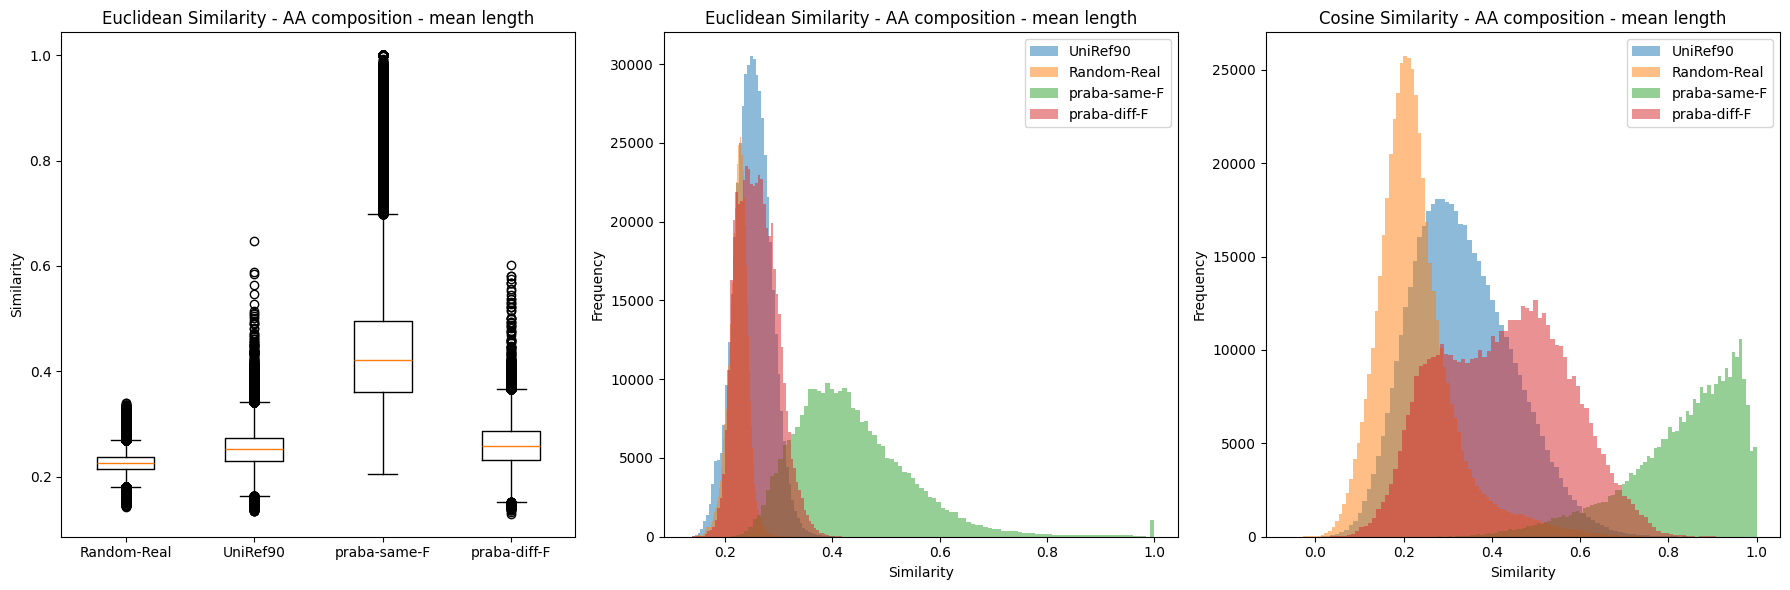

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a 1x3 grid of subplots for the second set

axs[0].boxplot([similarity0, sims_unshuff0, euclid_sim, euclid_sim1], labels=['Random-Real', 'UniRef90', 'praba-same-F', 'praba-diff-F'])
axs[0].set_title('Euclidean Similarity - AA composition - mean length')
axs[0].set_ylabel('Similarity')

axs[1].hist(sims_unshuff0, bins=100, alpha=0.5, label='UniRef90')
axs[1].hist(similarity0, bins=100, alpha=0.5, label='Random-Real')
axs[1].hist(euclid_sim, bins=100, alpha=0.5, label='praba-same-F')
axs[1].hist(euclid_sim1, bins=100, alpha=0.5, label='praba-diff-F')
axs[1].set_title('Euclidean Similarity - AA composition - mean length')
axs[1].legend(loc='upper right')
axs[1].set_xlabel('Similarity')
axs[1].set_ylabel('Frequency')

axs[2].hist(sims_unshuff1, bins=100, alpha=0.5, label='UniRef90')
axs[2].hist(similarity1, bins=100, alpha=0.5, label='Random-Real')
axs[2].hist(cos_sim, bins=100, alpha=0.5, label='praba-same-F')
axs[2].hist(cos_sim1, bins=100, alpha=0.5, label='praba-diff-F')
axs[2].set_title('Cosine Similarity - AA composition - mean length')
axs[2].legend(loc='upper right')
axs[2].set_xlabel('Similarity')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()